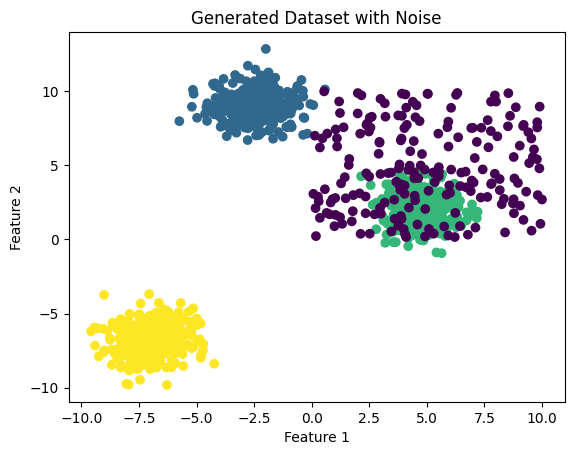

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# Generate synthetic data with 3 clusters
n_samples = 1000
n_features = 2
n_clusters = 3
random_state = 42

# Create blobs with 3 centers
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Add 20% noise by randomly assigning points to the dataset
noise_samples = int(0.2 * n_samples)
X_noise = np.random.rand(noise_samples, n_features) * 10  # Random noise in a larger range
X = np.vstack([X, X_noise])  # Add the noise to the original dataset
y_true = np.concatenate([y_true, np.full(noise_samples, -1)])  # True labels with noise assigned as -1

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o')
plt.title("Generated Dataset with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [2]:
k_range = range(2, 6)  # Try different values of K from 2 to 5
results = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)

    # Predictions and clustering performance
    y_pred = kmeans.predict(X)

    # Silhouette Score
    silhouette_avg = silhouette_score(X, y_pred)

    # Davies-Bouldin Index
    dbi = davies_bouldin_score(X, y_pred)

    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y_true, y_pred)

    # Store results for evaluation
    results.append((k, silhouette_avg, dbi, ari))

    print(f"K={k}: Silhouette Score={silhouette_avg:.3f}, Davies-Bouldin Index={dbi:.3f}, ARI={ari:.3f}")

K=2: Silhouette Score=0.684, Davies-Bouldin Index=0.416, ARI=0.379
K=3: Silhouette Score=0.754, Davies-Bouldin Index=0.338, ARI=0.767
K=4: Silhouette Score=0.711, Davies-Bouldin Index=0.580, ARI=0.824
K=5: Silhouette Score=0.675, Davies-Bouldin Index=0.620, ARI=0.854


In [3]:
# Find the best K based on Silhouette Score and Davies-Bouldin Index
best_k = sorted(results, key=lambda x: (x[1], -x[2]), reverse=True)[0]  # Prioritize Silhouette Score, then Davies-Bouldin
print(f"\nBest K={best_k[0]} with Silhouette Score={best_k[1]:.3f}")


Best K=3 with Silhouette Score=0.754


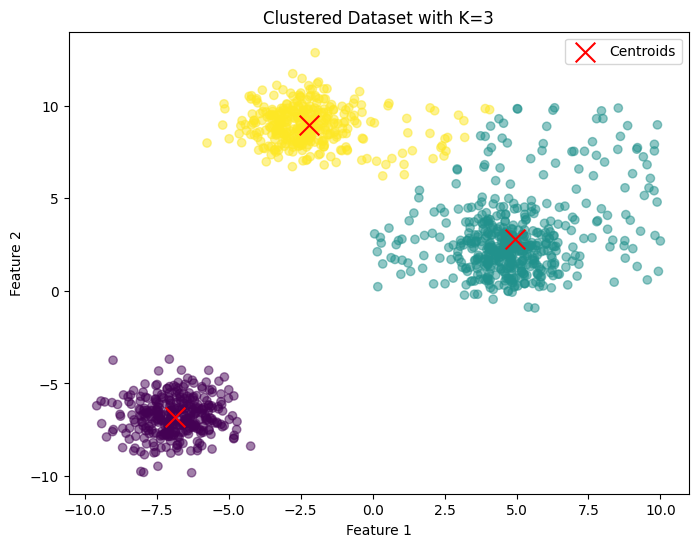

In [4]:
# Apply K-Means for the best K
best_kmeans = KMeans(n_clusters=best_k[0], random_state=random_state)
best_kmeans.fit(X)
y_best_pred = best_kmeans.predict(X)

# Plot the clusters with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_best_pred, cmap='viridis', marker='o', alpha=0.5)
centroids = best_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title(f"Clustered Dataset with K={best_k[0]}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()